# Polynomial Regression


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [75]:
%matplotlib inline

In [77]:
plt.figure(figsize=(6,4))

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## Importing the Dataset

In [4]:
df = pd.read_csv("../../Datasets/New_Position.csv")
df.head()

,Position,Level,Years,Languages,Salary
0,Business Analyst,1,1,2,45000
1,Junior Consultant,2,1,1,50000
2,Senior Consultant,3,1,2,60000
3,Manager,4,1,1,80000
4,Country Manager,5,1,4,110000


In [44]:
df

,Position,Level,Years,Languages,Salary
0,Business Analyst,1,1,2,45000
1,Junior Consultant,2,1,1,50000
2,Senior Consultant,3,1,2,60000
3,Manager,4,1,1,80000
4,Country Manager,5,1,4,110000
5,Region Manager,6,1,2,150000
6,Partner,7,1,1,200000
7,Senior Partner,8,1,1,300000
8,C-level,9,1,1,500000
9,CEO,10,1,2,1000000


In [80]:
X = df.iloc[10:,1].values
y = df.iloc[10:,-1].values

In [81]:
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [82]:
y

array([  60000,   65000,   70000,   90000,  150000,  180000,  340000,
        450000,  600000, 1500000], dtype=int64)

In [83]:
X = X.reshape(len(X),1)
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

## Trainig the lineal regression model on the whole dataset

Vamos a comparar el modelo Linear Regression con el Polynomial Regression

In [84]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

## Training the Polynomial Regression on the whole dataset

In [86]:
from sklearn.preprocessing import PolynomialFeatures
#Se crea el objeto y el parámetro degree es el número de exponenciales
poly_reg = PolynomialFeatures(degree=2)
#Se transforma la matriz de features en la matriz compuesta
X_poly = poly_reg.fit_transform(X)
#Ahora se entrena el modelo con la matriz de la columna level en diferentes potencias y con la variable dependiente
lin_reg2 = LinearRegression()
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

LinearRegression()

## Visualising the Linear Regression results

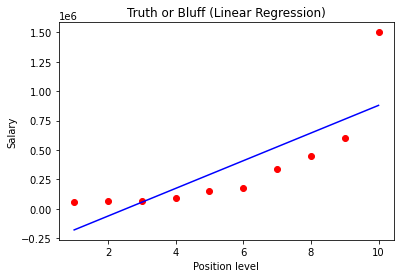

In [87]:
# Se visualiza con los datos reales
plt.scatter(X, y, color="red")
plt.plot(X, lin_reg.predict(X),color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

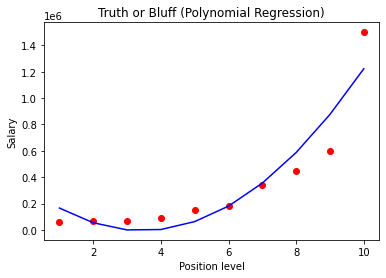

In [88]:
plt.scatter(X, y, color="red")
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

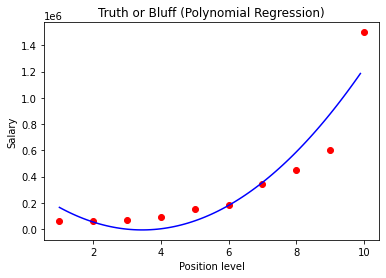

In [91]:
#Para que la curva se vea mejor, en lugar de usar cada punto de 0-10 aumentaremos la densidad de esos puntos.
# Por ejemplo antes 1,2,3,4.Ahora 1.1, 1.2, 1,3...
X_grid = np.arange(min(X), max(X), 0.1) #0.1 la densidad de los puntos, se le nombra como tip
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X,y, color = 'red')
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

Como se puede ver en los resultados de Polynomial Regression es mas cercano que lo de Lineal Regression

In [94]:
#Se utilizan los corchete porque el método predict espera un parámetro array o sparse matriz
lin_reg.predict([[6.5]])

array([467984.84848485])

In [95]:
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

array([260371.21212121])